# Cluster Analysis

In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from matplotlib import rcParams
import numpy as np

In [3]:
#reading the dataset
df = pd.read_csv('data\mohit_distinct_song.csv')
df.head(3)

Unnamed: 0      artistName     trackName  msPlayed             datetime  \
0          20  Intrinsic Flow      Moonbeam     89142  2022-05-11 18:13:00   
1          21        Hellmaos     Recognize     94736  2022-05-11 18:14:00   
2          22         Blumida  Cloud Castle     99428  2022-05-11 18:16:00   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.781   0.494  5.0   -11.040   0.0       0.0360        0.0790   
1         0.644   0.541  2.0    -5.801   1.0       0.0426        0.0102   
2         0.556   0.563  0.0    -6.731   1.0       0.0523        0.0400   

   instrumentalness  liveness  valence    tempo                      id  \
0             0.618     0.103    0.559  114.000  4TGDSeSPvNW1t9lEApQOVE   
1             0.000     0.102    0.165  119.513  1DMYEiuAgz1OKvANXiNFrN   
2             0.900     0.245    0.349   83.900  4XX98IFgGNlKNgJi7ozYKg   

   time_signature  
0             4.0  
1             4.0  
2             4.0

In [4]:
#dropping extra columns
df = df.drop(columns=['Unnamed: 0', 'datetime', 'id'])
df.head(3) 

artistName     trackName  msPlayed  danceability  energy  key  \
0  Intrinsic Flow      Moonbeam     89142         0.781   0.494  5.0   
1        Hellmaos     Recognize     94736         0.644   0.541  2.0   
2         Blumida  Cloud Castle     99428         0.556   0.563  0.0   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   -11.040   0.0       0.0360        0.0790             0.618     0.103   
1    -5.801   1.0       0.0426        0.0102             0.000     0.102   
2    -6.731   1.0       0.0523        0.0400             0.900     0.245   

   valence    tempo  time_signature  
0    0.559  114.000             4.0  
1    0.165  119.513             4.0  
2    0.349   83.900             4.0

In [5]:
# taking required columns
x = df[['danceability', 'energy', 'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo'	]]

## Standardizing the variables

In [6]:
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(x)

## Dimensionality Reduction

In [7]:
from sklearn.manifold import TSNE

In [8]:
X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)

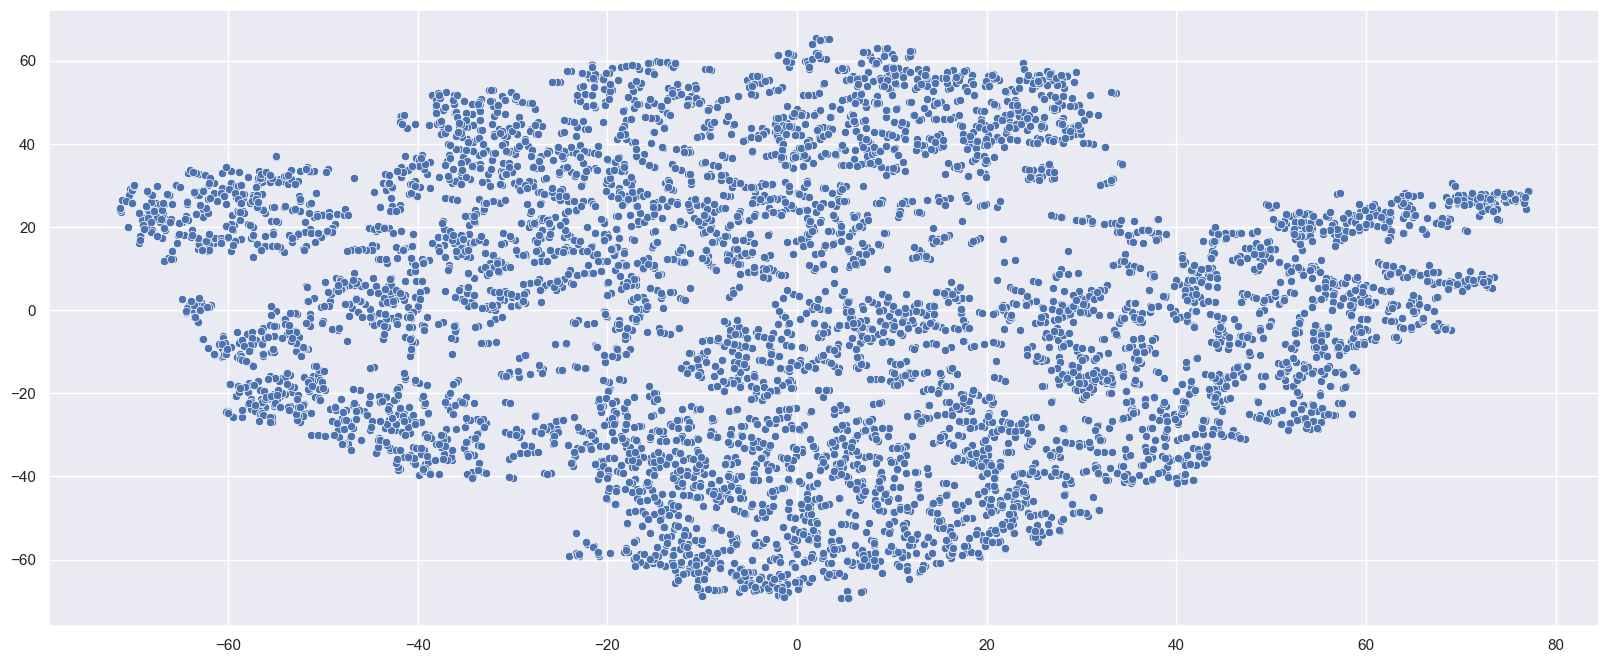

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# Plot the scatterplot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])

# Show the plot
plt.show()


In [11]:
data = pd.DataFrame({'d1': X_tsne[:, 0], 'd2': X_tsne[:, 1]})

## K-Means

In [12]:
from sklearn.cluster import KMeans

### Elbow Method

In [13]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

[57078.00000000006,
 43731.49291573957,
 37977.93115172486,
 34292.635015419924,
 31025.446420083048,
 28464.560263873012,
 26570.113343084515,
 25229.288110686342,
 24076.339875121186,
 23142.473641208915]

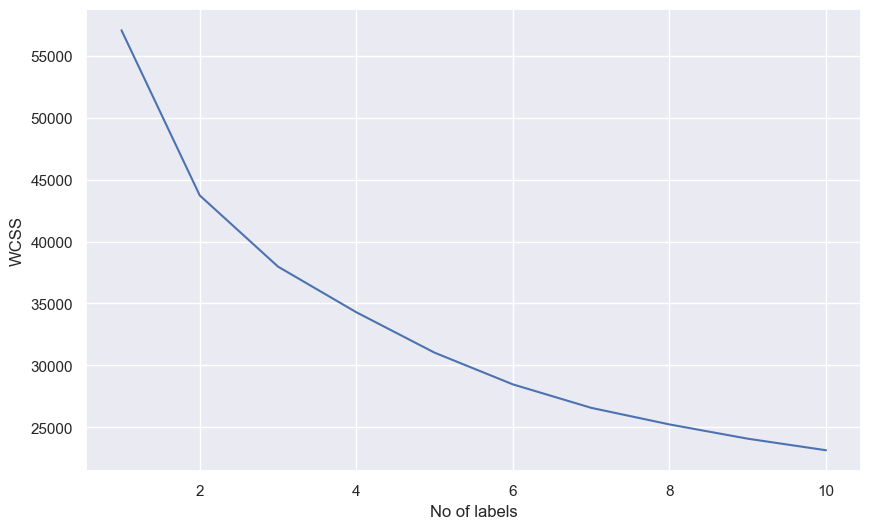

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the 'range' and 'wcss' variables

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line plot
sns.lineplot(x=range(1, 11), y=wcss)

# Set the x-label and y-label
plt.xlabel('No of labels')
plt.ylabel('WCSS')

# Show the plot
plt.show()


### Clusters

In [16]:
kmeans_model = KMeans(6)
kmeans_model.fit(x_scaled)
data['kmeans']=kmeans_model.fit_predict(x_scaled)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='d1', ylabel='d2'>

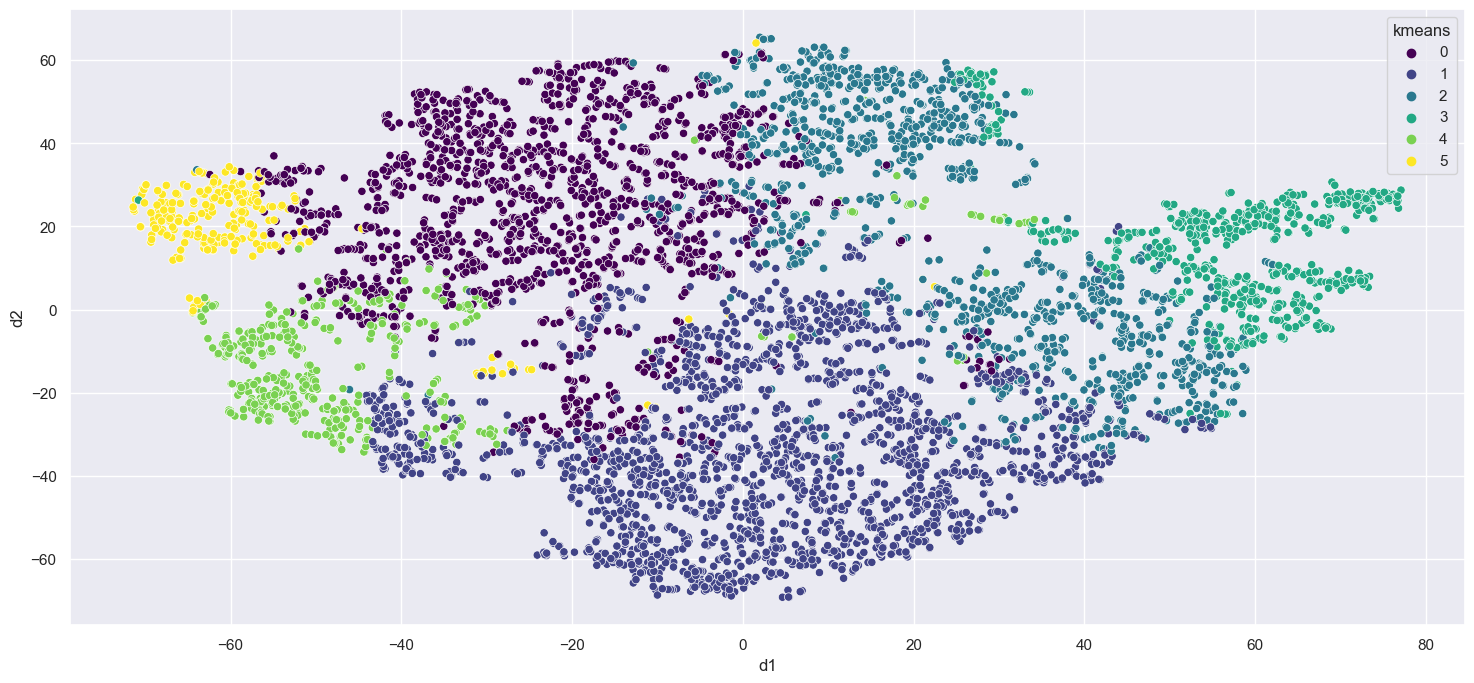

In [17]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='kmeans', palette='viridis')

In [18]:
data['kmeans'].value_counts()

kmeans
1    2162
0    1628
2    1202
3     623
4     455
5     272
Name: count, dtype: int64

In [19]:
kmeans_model.cluster_centers_

array([[ 2.94591038e-01,  5.62001820e-01,  6.52474678e-01,
        -4.67022580e-02, -4.30298136e-01, -1.01568892e+00,
        -1.57905656e-01,  8.47973743e-01,  6.10797901e-02],
       [ 3.55641860e-01,  3.95497968e-01,  1.98305355e-01,
        -1.90655213e-01, -6.15857319e-01,  7.61888072e-01,
        -2.80343200e-01, -3.04257143e-01,  1.02017048e-01],
       [-2.52277183e-01, -7.87445883e-01, -3.43482584e-01,
        -2.94285377e-01,  1.04356292e+00, -1.44899754e-01,
        -2.54998730e-01, -3.06365076e-01,  6.98339745e-02],
       [-1.75573835e+00, -1.79397907e+00, -2.16123520e+00,
        -3.10366867e-01,  1.62093796e+00,  8.16734957e-01,
        -2.75480525e-01, -9.45037737e-01, -7.18205795e-01],
       [-5.82224511e-02,  4.60520347e-01,  3.06309617e-01,
         1.17243008e-03, -4.03136238e-01, -1.98925778e-01,
         2.82164599e+00,  1.13772218e-01,  9.54266765e-02],
       [ 6.43832793e-01,  3.10478224e-01,  4.72520583e-01,
         3.80382360e+00, -1.79987730e-01, -8.677500

In [21]:
data.head(5)

d1         d2  kmeans
0  -9.148554 -30.126127       1
1  -9.099489  19.955091       0
2 -27.767412 -34.169823       1
3  60.357674  21.476925       3
4  67.262497   6.533975       3

## Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
model_agg = AgglomerativeClustering(n_clusters=6)
model_agg.fit(x_scaled)
data['agg']=model_agg.fit_predict(x_scaled)

<Axes: xlabel='d1', ylabel='d2'>

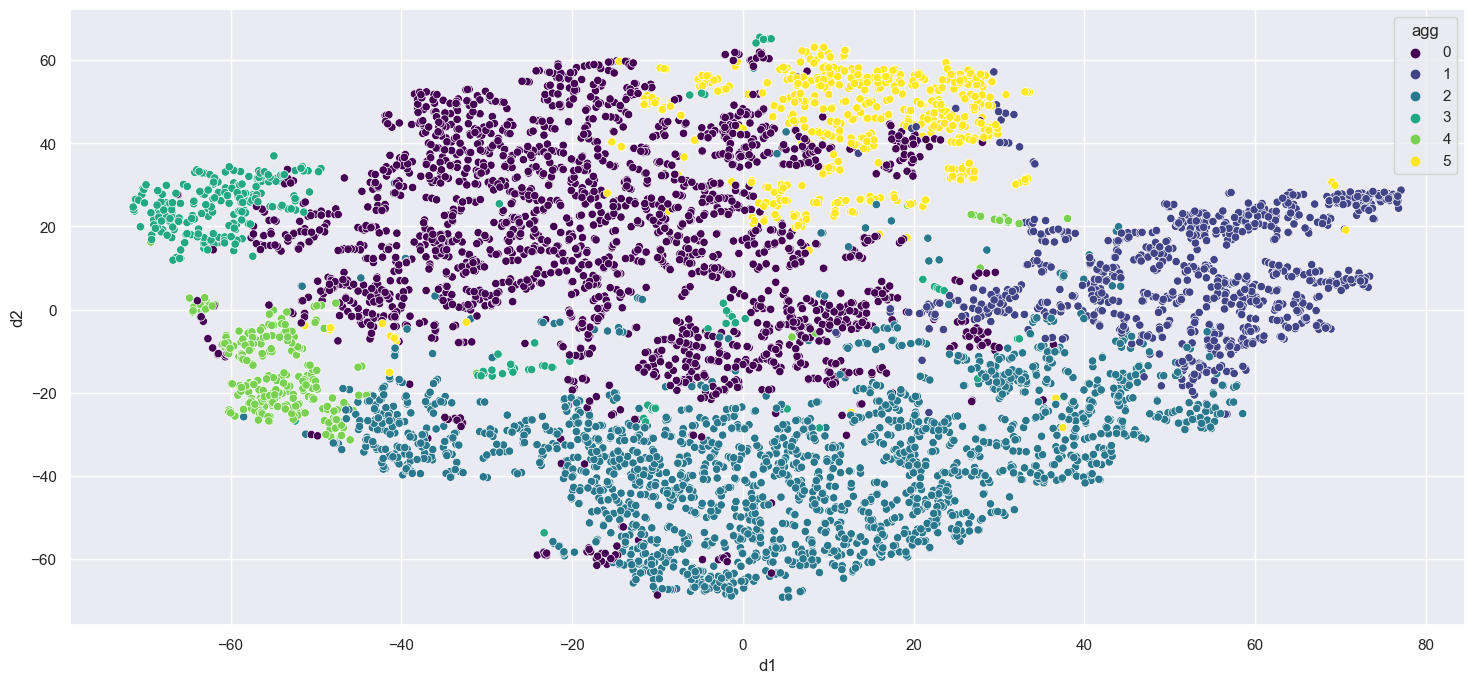

In [24]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='agg', palette='viridis')

In [25]:
data['agg'].value_counts()

agg
0    2222
2    2084
1     887
5     556
3     315
4     278
Name: count, dtype: int64

## Affinity Propagation Clustering

In [26]:
from sklearn.cluster import AffinityPropagation

In [27]:
model_ap = AffinityPropagation(damping=0.9)
model_ap.fit(x_scaled)
data['ap'] = model_ap.predict(x_scaled)

<Axes: xlabel='d1', ylabel='d2'>

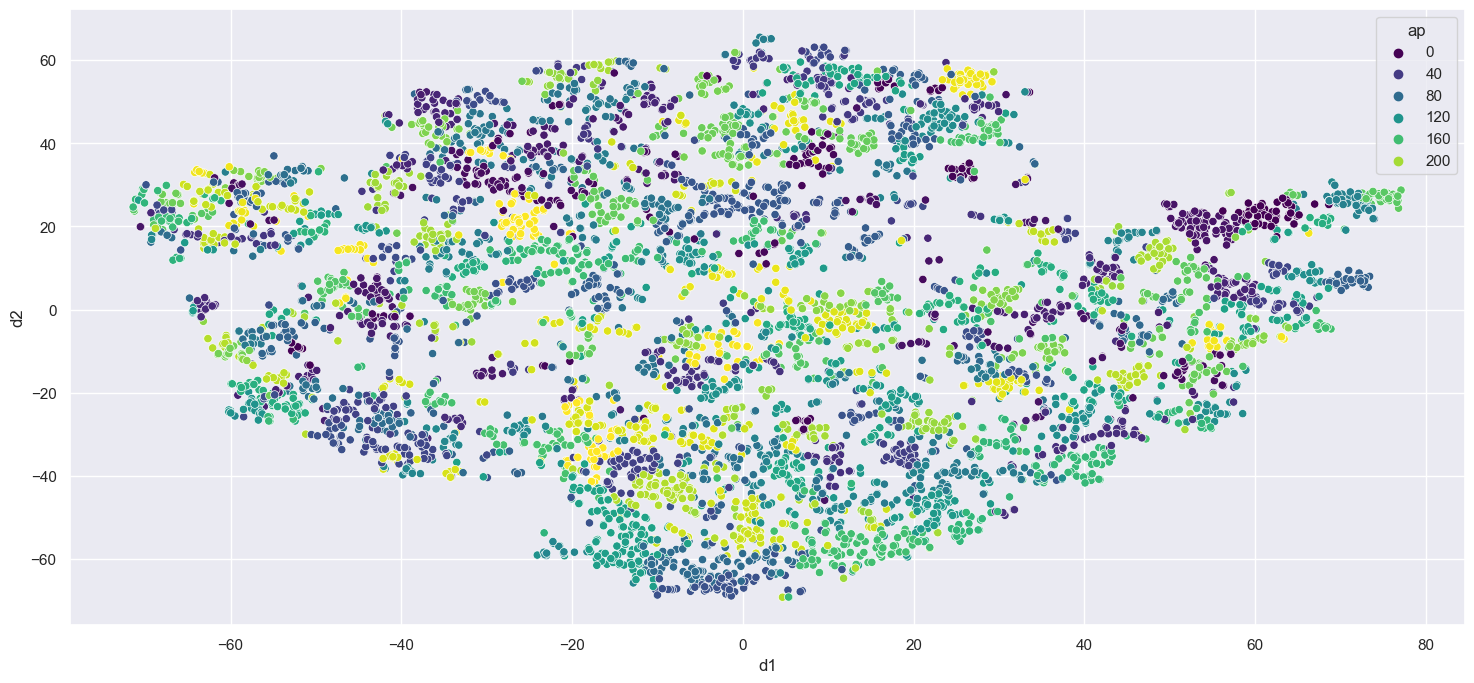

In [28]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='ap', palette='viridis')

In [29]:
data['ap'].value_counts()

ap
80     93
161    91
213    82
12     79
158    77
       ..
26      1
130     1
151     1
197     1
206     1
Name: count, Length: 232, dtype: int64

## BIRCH

In [30]:
from sklearn.cluster import Birch

In [33]:
model_birch = Birch(threshold=0.01, n_clusters=2)
model_birch.fit(x_scaled)
data['birch'] = model_birch.predict(x)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Birch was fitted without feature names
  warnings.warn(


<Axes: xlabel='d1', ylabel='d2'>

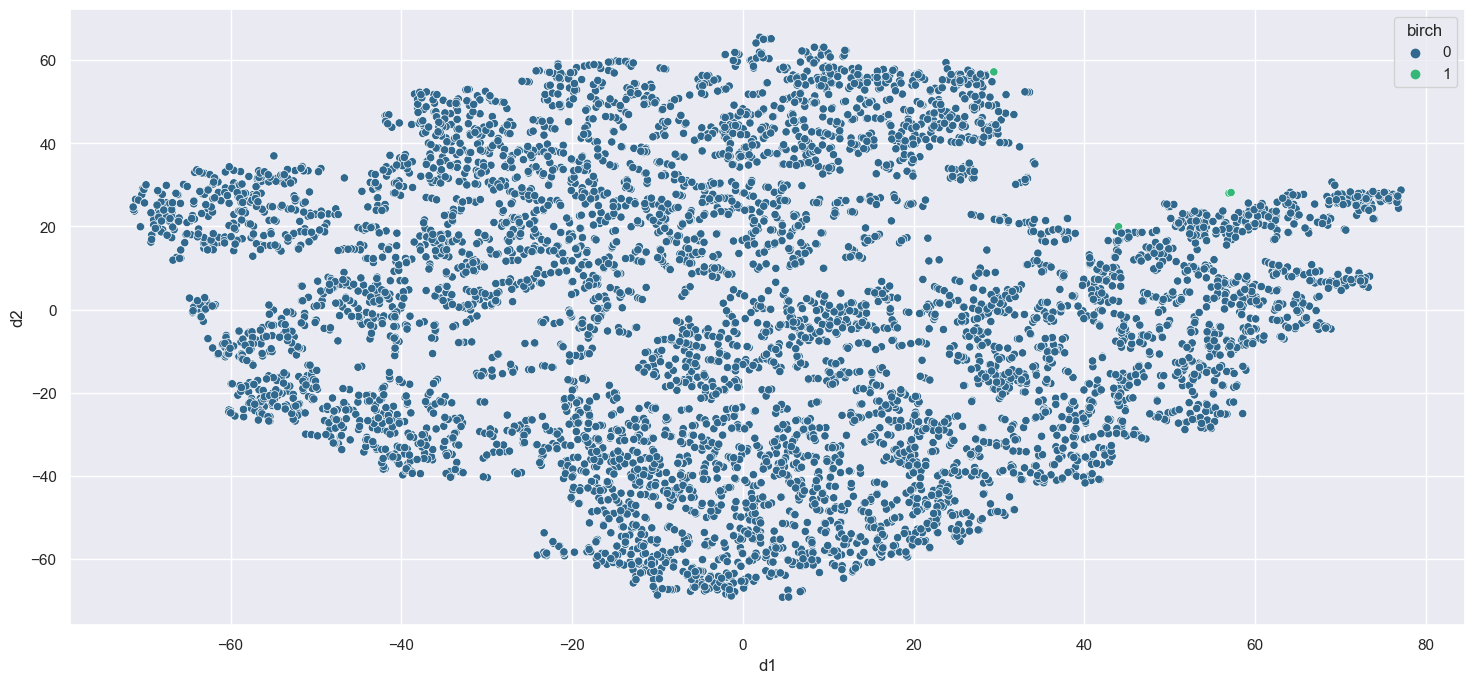

In [34]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='birch', palette='viridis')

Which ever cluster number I am providing this algorithm is making only 1 cluster. Hence this algorithm is not performing well for our dataset.

## DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
model_dbscan = DBSCAN(eps=0.30, min_samples=9)
data['dbscan'] = model_dbscan.fit_predict(x)

<Axes: xlabel='d1', ylabel='d2'>

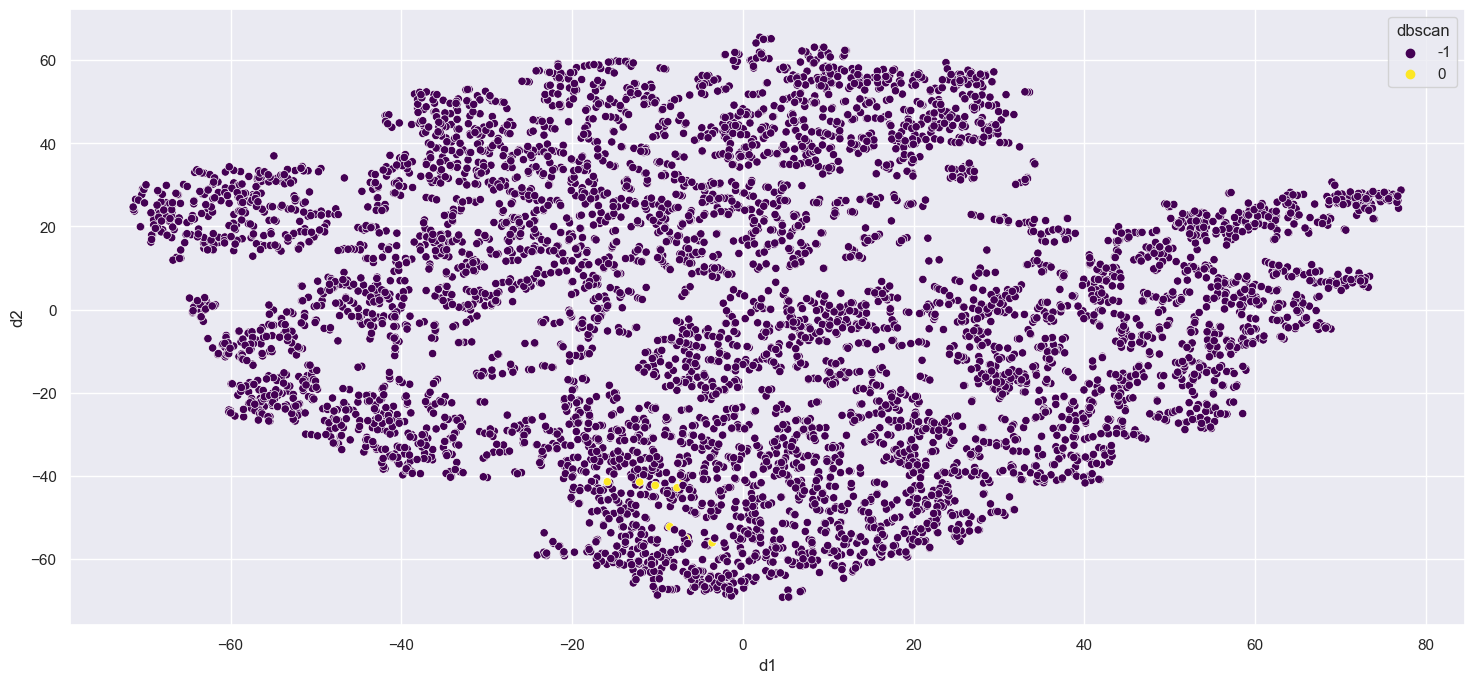

In [38]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='dbscan', palette='viridis')

In [47]:
model_dbscan

DBSCAN(eps=0.3, min_samples=9)

## Mini-Batch Kmeans

In [39]:
from sklearn.cluster import MiniBatchKMeans

In [40]:
model_minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
model_minibatch_kmeans.fit(x_scaled)
data['minibatch_kmeans'] = model_minibatch_kmeans.predict(x)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


<Axes: xlabel='d1', ylabel='d2'>

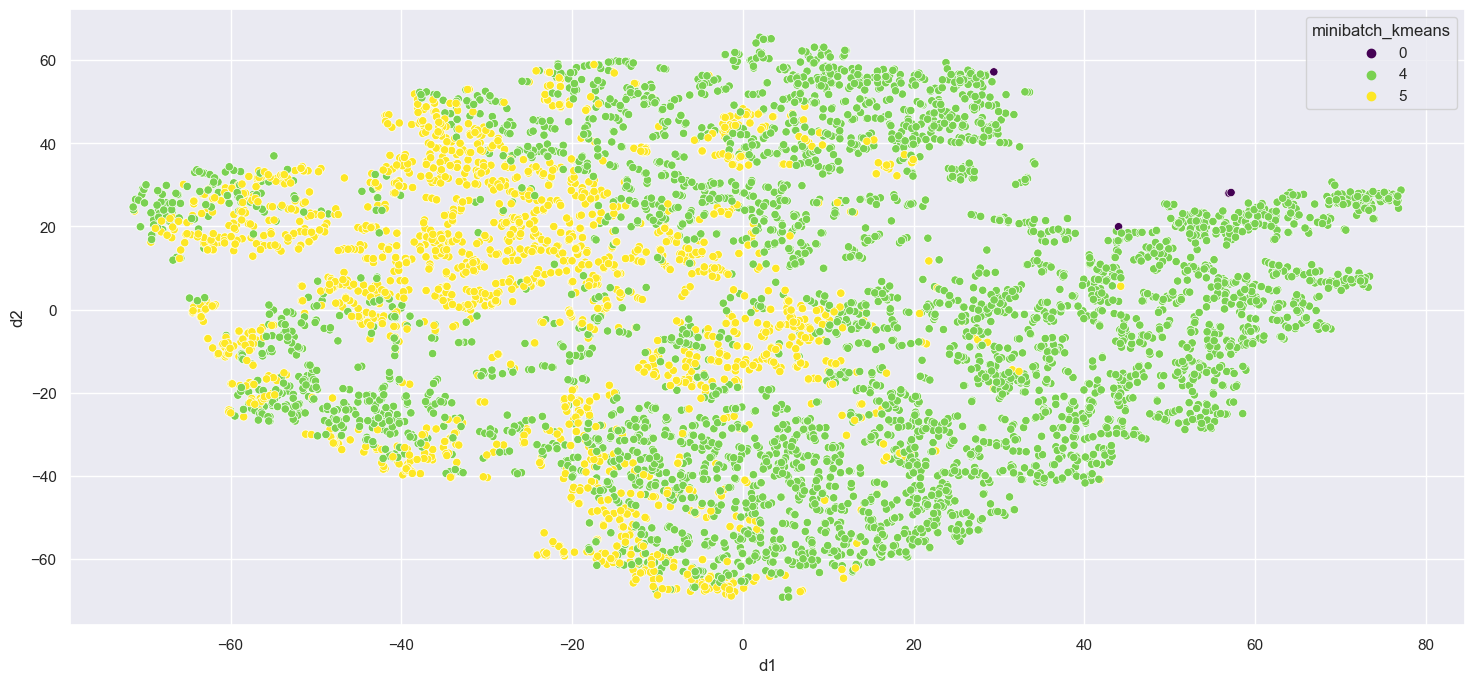

In [41]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='minibatch_kmeans', palette='viridis')

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

# Assuming you have the data stored in 'X' variable

# Apply k-means clustering
kmeans_model = KMeans(n_clusters=6)
kmeans_labels = kmeans_model.fit_predict(x_scaled)
kmeans_silhouette_score = silhouette_score(x_scaled, kmeans_labels)
kmeans_wcss = kmeans_model.inertia_

# Apply agglomerative clustering
agg_model = AgglomerativeClustering(n_clusters=6)
agg_labels = agg_model.fit_predict(x_scaled)
agg_silhouette_score = silhouette_score(x_scaled, agg_labels)
agg_wcss = None  # Agglomerative clustering does not have a direct WCSS metric

# Print the results
print("K-Means Silhouette Score:", kmeans_silhouette_score)
print("K-Means WCSS:", kmeans_wcss)
print("Agglomerative Silhouette Score:", agg_silhouette_score)
print("Agglomerative WCSS: Not applicable")

# Note: Agglomerative clustering does not have a direct WCSS metric because it does not use the concept of centroids.


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.19540690188646773
K-Means WCSS: 28464.46012865152
Agglomerative Silhouette Score: 0.15309151821072756
Agglomerative WCSS: Not applicable


So Kmeans is performing best on our dataset since it has visually better seperated clusters and better silhoutte score so i will be analyzing my clusters based on kmeans reults

In [43]:
x= x.join(data['kmeans'])
x.head(3)

danceability  energy  loudness  speechiness  acousticness  \
0         0.781   0.494   -11.040       0.0360        0.0790   
1         0.644   0.541    -5.801       0.0426        0.0102   
2         0.556   0.563    -6.731       0.0523        0.0400   

   instrumentalness  liveness  valence    tempo  kmeans  
0             0.618     0.103    0.559  114.000       1  
1             0.000     0.102    0.165  119.513       0  
2             0.900     0.245    0.349   83.900       1

In [45]:
average = x.groupby('kmeans').mean().reset_index()
average

kmeans  danceability    energy   loudness  speechiness  acousticness  \
0       0      0.630324  0.699827  -7.140369     0.059743      0.160086   
1       1      0.641664  0.659943  -9.751566     0.050826      0.098905   
2       2      0.527767  0.374500 -12.873175     0.044395      0.644851   
3       3      0.245967  0.131735 -23.338868     0.043398      0.834791   
4       4      0.564139  0.675497  -9.132002     0.062714      0.168927   
5       5      0.695728  0.639308  -8.175044     0.298485      0.242337   

   instrumentalness  liveness   valence       tempo  
0          0.095542  0.144382  0.514027  121.878544  
1          0.790633  0.126847  0.240477  123.071267  
2          0.436238  0.130480  0.239940  122.143371  
3          0.812228  0.127553  0.088360   99.694334  
4          0.415115  0.570189  0.339654  122.872435  
5          0.153611  0.197049  0.470929  120.167070

In [46]:
df = df.join(data['kmeans'])

In [47]:
df

artistName                                     trackName  msPlayed  \
0     Intrinsic Flow                                      Moonbeam     89142   
1           Hellmaos                                     Recognize     94736   
2            Blumida                                  Cloud Castle     99428   
3     Intrinsic Flow                            Alone on An Island    119999   
4          Rangitoto                                     Morganite     85714   
...              ...                                           ...       ...   
6337     The Bhaktas  Hare Krishna (feat. Krishna Das & Jai Uttal)    595200   
6338     The Bhaktas                                Gayatri Mantra    549600   
6339   Sariel Orenda                                    Ganapataye    404878   
6340     The Bhaktas                                 Cosmic Mantra    541500   
6341     The Bhaktas                         Pitr Purusebhyo Namah    393600   

      danceability  energy   key  loudness  mode  speechiness  acousticness  \
0           0.7810  0.4940   5.0   -11.040   0.0       0.0360       0.07900   
1           0.6440  0.5410   2.0    -5.801   1.0       0.0426       0.01020   
2           0.5560  0.5630   0.0    -6.731   1.0       0.0523       0.04000   
3           0.2150  0.0796   0.0   -23.323   1.0       0.0303       0.94500   
4           0.1660  0.0367   0.0   -26.202   1.0       0.0398       0.70100   
...            ...     ...   ...       ...   ...          ...           ...   
6337        0.4770  0.4250   0.0   -13.631   1.0       0.0371       0.72500   
6338        0.4240  0.4480   9.0   -12.682   0.0       0.0752       0.85600   
6339        0.6220  0.6700  10.0   -13.833   1.0       0.0576       0.00236   
6340        0.0855  0.3380   0.0   -12.509   1.0       0.0341       0.61800   
6341        0.5130  0.4320   2.0   -14.677   1.0       0.0316       0.28900   

      instrumentalness  liveness  valence    tempo  time_signature  kmeans  
0             0.618000    0.1030   0.5590  114.000             4.0       1  
1             0.000000    0.1020   0.1650  119.513             4.0       0  
2             0.900000    0.2450   0.3490   83.900             4.0       1  
3             0.955000    0.0720   0.0394   70.316             4.0       3  
4             0.823000    0.1080   0.1350  139.730             3.0       3  
...                ...       ...      ...      ...             ...     ...  
6337          0.006560    0.4840   0.1190  109.914             4.0       4  
6338          0.000019    0.1120   0.2380   81.979             1.0       2  
6339          0.491000    0.0422   0.2740  172.007             4.0       1  
6340          0.965000    0.1090   0.0289   85.139             3.0       3  
6341          0.705000    0.2190   0.0392  120.016             4.0       2  

[6342 rows x 16 columns]

### Cluster Profile

### Cluster 0

**Features**

danceability | energy
--- | ---
0.63	| 0.69

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.05	| 0.16	| 0.09

loudness | liveness
--- | ---
-5.36 | 0.14

valence	| tempo
--- | ---
0.51 | 121

**Description**  
As per the features, cluster 0 contains most energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have uplifting emotion based on their valence value. *(Beats + Uplifting)*

Few of the songs in this cluster are as follows:


In [48]:
cluster_0 = df.loc[ df['kmeans'] == 0, ['artistName', 'trackName']]
cluster_0.sample(5)

artistName                          trackName
2777     Jack Rosslyn                         From Above
3676           Satori                         Mahsaamini
3211  Alpha Hypnotica                            Genesis
5528          MC YOGI  Ganesh Is Fresh (feat. Jai Uttal)
1237  Nature and Love                   Life of the Seas

### Cluster 1

**Features**

danceability | energy
--- | ---
0.64	| 0.65

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.05	| 0.09	| 0.79

loudness | liveness
--- | ---
-9.75 | 0.12

valence	| tempo
--- | ---
0.24 | 123

**Description**  
Cluster 1 represents a group of songs characterized by their danceability, energy, instrumental focus, and moderate acoustic elements. These songs are likely to evoke a sense of energy and rhythm, making them suitable for activities such as dancing or uplifting mood (Dance+Uplifting Mood)

Few of the songs in this cluster are as follows:


In [42]:
cluster_1 = df.loc[ df['agg'] == 1, ['artistName', 'trackName']]
cluster_1.sample(5)

artistName                         trackName
1042                 FKJ                           Greener
27544      Jan Blomqvist  High On Beat - Sofi Tukker Remix
1340   Thaikkudam Bridge                  Thekkini - Namah
9963              Andara                        Om Pra Mah
9542        3 Doors Down                        Kryptonite

In [49]:
cluster_1 = df.loc[ df['kmeans'] == 1, ['artistName', 'trackName']]
cluster_1.sample(5)

artistName       trackName
2656  Master Minded  Fearless 528hz
5395      Landikhan           Solea
3809         Major7    Vicious Game
2696        Obsqure   Analog Beauty
5396           Gumi      Chemistrix

### Cluster 2

**Features**


danceability | energy
--- | ---
0.52	| 0.37

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.04	| 0.64	| 0.43

loudness | liveness
--- | ---
-12.8 | 0.13

valence	| tempo
--- | ---
0.23 | 122

**Description**  
 this cluster represents a group of songs with moderate danceability, lower energy levels, and a mellow and subdued mood. These songs are likely to evoke a sense of calmness or introspection and may be suitable for relaxation or creating a peaceful ambiance (relax + calm) 

Few of the songs in this cluster are as follows:


In [51]:
cluster_2 = df.loc[ df['kmeans'] == 2, ['artistName', 'trackName']]
cluster_2.sample(5)

artistName                         trackName
1785           Ceeys  Fallen - Ben Lukas Boysen Rework
1761  Trippin Jaguar                           Astraea
1555          Ritviz                          Aas Paas
5056      Mandragora                         Pachamama
5103       High Math                       Ghost Plant

### Cluster 3

**Features**


danceability | energy
--- | ---
0.24	| 0.13

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.26	| 0.19	| 0.003

loudness | liveness
--- | ---
-23.3 | 0.13

valence	| tempo
--- | ---
0.23 | 122

**Description**  
this cluster represents a group of songs with low danceability, very low energy levels, and a calm and tranquil mood. These songs are likely to evoke a sense of relaxation and introspection, making them suitable for creating a peaceful ambiance or for quiet and reflective moments.

Few of the songs in this cluster are as follows:


In [52]:
cluster_3 = df.loc[ df['kmeans'] == 3, ['artistName', 'trackName']]
cluster_3.sample(5)

artistName                    trackName
4599             Hinkstep  Moonwalk On Mushroom Street
6007              Cosmyte                  Thingamabob
2566  God Is An Astronaut           Dark Rift (Somnia)
3976           AstroPilot         Farscape - Revisited
2519             Zazenkai  Drone Flight - Instrumental

### Cluster 4

**Features**


danceability | energy
--- | ---
0.56	| 0.67

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.16	| 0.41

loudness | liveness
--- | ---
-5.15 | 0.57

valence	| tempo
--- | ---
0.33 | 122

**Description**  
this cluster represents a group of songs with moderate danceability, high energy levels, and a lively and upbeat mood. These songs are likely to inspire movement and create an energetic and positive atmosphere. They can be suitable for activities such as workouts, parties, or any situation where a vibrant and lively musical experience is desired

Few of the songs in this cluster are as follows:


In [54]:
cluster_4 = df.loc[ df['kmeans'] == 4, ['artistName', 'trackName']]
cluster_4.sample(5)

artistName            trackName
2572           Poranguí  Heart of the Mother
2099               Elea                Yatra
1026    Saurabh Kumawat    Chandi Jaisa Rang
318   Moskva-Kassiopeya               Eraser
4622       Liquid Bloom      Corazón de Gaia

### Cluster 5

**Features**


danceability | energy
--- | ---
0.69	| 0.63

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.29	| 0.24	| 0.15

loudness | liveness
--- | ---
-8.17 | 0.19

valence	| tempo
--- | ---
0.47 | 120

**Description**  
This cluster represents songs with high danceability and energy, with a mix of vocals and instrumental elements. The songs have a lively and energetic feel, making them suitable for activities that require an upbeat and dynamic musical experience. They can be enjoyable for dancing, workouts, or any situation where a lively and positive atmosphere is desired.

Few of the songs in this cluster are as follows:


In [55]:
cluster_5 = df.loc[ df['kmeans'] == 5, ['artistName', 'trackName']]
cluster_5.sample(5)

artistName                          trackName
2809            Akriza                        Coming Home
6069   Jasmine Sandlas                             Pinjra
2071    Ibrahim & Ømer                      Day 'n' Night
935              Feder  Goodbye (feat. Lyse) - Radio Edit
617   Dinah Washington                     Cry Me A River